In [105]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams.update({'font.size':20})

In [106]:
def load_results(experiment_path, d, n):
    results = []
    for dirpath, dirnames, filenames in os.walk(experiment_path):
        for filename in [f for f in filenames if '_'+str(d)+'_'+str(n) in f and 'time' in f]:    
            print(filename)
            return np.loadtxt(os.path.join(dirpath, filename))
    return results

def load_data(experiment_path, d, n):
    results = []
    for dirpath, dirnames, filenames in os.walk(experiment_path):
        for filename in [f for f in filenames if '_'+str(d)+'_'+str(n) in f and 'data' in f]:    
            print(filename)
            return np.mean(np.loadtxt(os.path.join(dirpath, filename)))
    return results

In [107]:
dataset_r = [5,11,12,14,15,16]

times_dataset = []
data_dataset = []
error_dataset = []

for i in dataset_r:
    values = np.array(load_results("./results/multi_b", 1024, i))
    error_dataset.append(np.std(values))
    times_dataset.append(np.mean(values))
    data_dataset.append(load_data("./results/multi_b",1024,i))
    
print('time',times_dataset)
print('error', error_dataset)
print('data',data_dataset)


truncated_values = np.array(load_results("./results", 1024, 5))
print('truncated time', np.mean(truncated_values))
print('truncated error', np.std(truncated_values))
print('truncated data', load_data("./results",1024,5))

time_1024_5_multi_b
data_1024_5_multi_b
time_1024_11_multi_b
data_1024_11_multi_b
time_1024_12_multi_b
data_1024_12_multi_b
time_1024_14_multi_b
data_1024_14_multi_b
time_1024_15_multi_b
data_1024_15_multi_b
time_1024_16_multi_b
data_1024_16_multi_b
time [1.3773027272727274, 1.7263363636363638, 1.7260481818181816, 1.8145436363636362, 1.8319127272727271, 1.737231818181818]
error [0.20153256425748753, 0.06505261315032584, 0.12185850713155227, 0.1796819702733758, 0.15356338792415272, 0.11670733160877116]
data [1.38555, 2.29129, 2.4263599999999994, 2.69651, 2.8315799999999998, 2.96665]
time_1024_5
truncated time 2.7967109090909097
truncated error 0.10332091964136399
data_1024_5
truncated data 1.1777000000000004


In [108]:
d = [16,1024,2048,4096,8192]
n = [5,10,15,20,25,30]

times = []
data = []
error = []
for i in d:
    temp = []
    temp_data = []
    err = []
    for j in n:
        values = np.array(load_results("./results/multi_b", i, j))
        err.append(np.std(values))
        temp.append(np.mean(values))
        temp_data.append(load_data("./results/multi_b",i,j))
    times.append(temp) 
    
    data.append(temp_data)
    error.append(err)

    
print(data)
d_error = np.array(error).T
d_times = np.array(times).T
d_data = np.array(data).T
print(np.array(times))
print(np.array(data))
print(np.array(error))


time_16_5_multi_b
data_16_5_multi_b
time_16_10_multi_b
data_16_10_multi_b
time_16_15_multi_b
data_16_15_multi_b
time_16_20_multi_b
data_16_20_multi_b
time_16_25_multi_b
data_16_25_multi_b
time_16_30_multi_b
data_16_30_multi_b
time_1024_5_multi_b
data_1024_5_multi_b
time_1024_10_multi_b
data_1024_10_multi_b
time_1024_15_multi_b
data_1024_15_multi_b
time_1024_20_multi_b
data_1024_20_multi_b
time_1024_25_multi_b
data_1024_25_multi_b
time_1024_30_multi_b
data_1024_30_multi_b
time_2048_5_multi_b
data_2048_5_multi_b
time_2048_10_multi_b
data_2048_10_multi_b
time_2048_15_multi_b
data_2048_15_multi_b
time_2048_20_multi_b
data_2048_20_multi_b
time_2048_25_multi_b
data_2048_25_multi_b
time_2048_30_multi_b
data_2048_30_multi_b
time_4096_5_multi_b
data_4096_5_multi_b
time_4096_10_multi_b
data_4096_10_multi_b
time_4096_15_multi_b
data_4096_15_multi_b
time_4096_20_multi_b
data_4096_20_multi_b
time_4096_25_multi_b
data_4096_25_multi_b
time_4096_30_multi_b
data_4096_30_multi_b
time_8192_5_multi_b
data

In [109]:
times_d_r = d_times/np.array(n)[:,None]
times_d_r = np.transpose(np.transpose(times_d_r)/np.array(d)[:,None])
times_avg = np.mean(times_d_r)
print('time is',times_avg)

data_d_r = d_data/np.array(n)[:,None]
data_d_r = np.transpose(np.transpose(data_d_r)/np.array(d)[:,None])
data_avg = np.mean(data_d_r)
print('data',data_avg)


time is 0.00014965324445625653
data 0.00022223902365451392


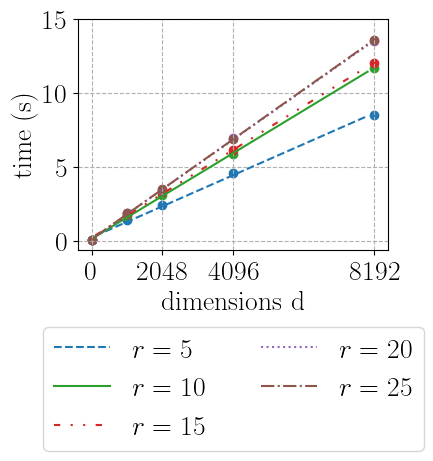

In [111]:
dataset_sizes = d#[200, 400, 800, 1600,4096]

x = dataset_sizes
fig, ax = plt.subplots(1, figsize=(4,3))
ax.grid(ls="dashed")
ax.set(xlabel='dimensions d', ylabel=r'time (s)')
myline =np.linspace(100, 8000, 100)

y = d_times[0]
mymodel = np.poly1d(np.polyfit(d, y, 1))
ax.scatter(d, y,c='#1f77b4')
ax.plot(myline, mymodel(myline),linestyle='dashed',label=r"$r=5$",c='#1f77b4')
err = d_error[0]
# ax.errorbar(d, y,ls='none', yerr=err,c='black', fmt='k')

y = d_times[1]
mymodel = np.poly1d(np.polyfit(d, y, 1))
ax.scatter(d, y,c='#2ca02c')
ax.plot(myline, mymodel(myline),linestyle='solid',label=r"$r=10$",c='#2ca02c')
err = d_error[1]
# ax.errorbar(d, y,ls='none', yerr=err,c='black', fmt='.k')

y = d_times[2]
mymodel = np.poly1d(np.polyfit(d, y, 1))
ax.scatter(d, y,c='#d62728')
ax.plot(myline, mymodel(myline),linestyle=(0, (3, 5, 1, 5, 1, 5)),label=r"$r=15$",c='#d62728')
err = d_error[2]
# ax.errorbar(d, y,ls='none', yerr=err,c='black', fmt='.k')

y = d_times[3]
mymodel = np.poly1d(np.polyfit(d, y, 1))
ax.scatter(d, y,c='#9467bd')
ax.plot(myline, mymodel(myline),linestyle='dotted',label=r"$r=20$",c='#9467bd')
err = d_error[3]
# ax.errorbar(d, y,ls='none', yerr=err,c='black', fmt='.k')

y = d_times[4]
mymodel = np.poly1d(np.polyfit(d, y, 1))
ax.scatter(d, y,c='#8c564b')
ax.plot(myline, mymodel(myline),linestyle='dashdot',label=r"$r=25$",c='#8c564b')
err = d_error[4]
ax.set_xticks([0,2048,4096,8192])
ax.set_yticks([0,5,10,15])
# ax.errorbar(d, y,ls='none', yerr=err,c='black', fmt='.k')

# y = d_times[5]
# mymodel = np.poly1d(np.polyfit(d, y, 1))
# ax.scatter(d, y,c='#e377c2')
# ax.plot(myline, mymodel(myline),linestyle=(5, (10, 3)),label=r"$r=30$",c='#e377c2')
# err = d_error[5]
# ax.errorbar(d, y,ls='none', yerr=err,c='black', fmt='.k')

# y = d_times[6]
# mymodel = np.poly1d(np.polyfit(d, y, 1))
# ax.scatter(d, y,c='black')
# ax.plot(myline, mymodel(myline),linestyle=(5, (10, 3)),label=r"$r=80$",c='black')
# err = d_error[6]
# ax.errorbar(d, y,ls='none', yerr=err,c='black', fmt='.k')

plt.savefig("benchmark_time_d_multi_b.pdf", bbox_inches='tight')


legend =ax.legend(loc=10, ncol=2, bbox_to_anchor=(0.5, -0.6))

plt.show()

def export_legend(legend, filename="legend_r.pdf"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)


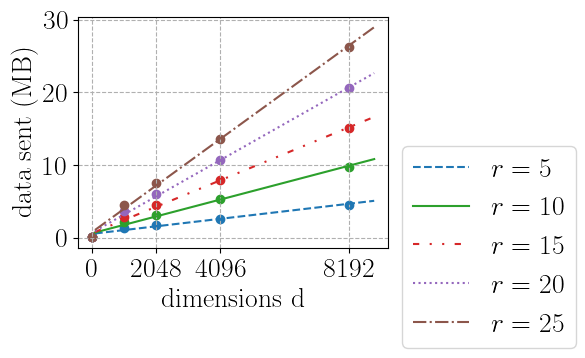

In [112]:
dataset_sizes = d#[200, 400, 800, 1600,4096]
# d = d[1:]

x = dataset_sizes
fig, ax = plt.subplots(1, figsize=(4,3))
ax.grid(ls="dashed")
ax.set(xlabel='dimensions d', ylabel=r'data sent (MB)')
myline =np.linspace(100, 9000, 100)

y = d_data[0]
mymodel = np.poly1d(np.polyfit(d, y, 1))
ax.scatter(d, y,c='#1f77b4')
ax.plot(myline, mymodel(myline),linestyle='dashed',label=r"$r=5$",c='#1f77b4')

y = d_data[1]
mymodel = np.poly1d(np.polyfit(d, y, 1))
ax.scatter(d, y,c='#2ca02c')
ax.plot(myline, mymodel(myline),linestyle='solid',label=r"$r=10$",c='#2ca02c')

y = d_data[2]
mymodel = np.poly1d(np.polyfit(d, y, 1))
ax.scatter(d, y,c='#d62728')
ax.plot(myline, mymodel(myline),linestyle=(0, (3, 5, 1, 5, 1, 5)),label=r"$r=15$",c='#d62728')

y = d_data[3]
mymodel = np.poly1d(np.polyfit(d, y, 1))
ax.scatter(d, y,c='#9467bd')
ax.plot(myline, mymodel(myline),linestyle='dotted',label=r"$r=20$",c='#9467bd')

y = d_data[4]
mymodel = np.poly1d(np.polyfit(d, y, 1))
ax.scatter(d, y,c='#8c564b')
ax.plot(myline, mymodel(myline),linestyle='dashdot',label=r"$r=25$",c='#8c564b')

ax.set_xticks([0,2048,4096,8192])
ax.set_yticks([0,10,20,30])

# y = d_data[5]
# mymodel = np.poly1d(np.polyfit(d, y, 1))
# ax.scatter(d, y,c='#e377c2')
# ax.plot(myline, mymodel(myline),linestyle=(5, (10, 3)),label=r"$r=30$",c='#e377c2')

# y = d_data[6]
# mymodel = np.poly1d(np.polyfit(d, y, 1))
# ax.scatter(d, y,c='#e377c2')
# ax.plot(myline, mymodel(myline),linestyle='dashed',label=r"$r=80$",c='#e377c2')

plt.savefig("benchmark_data_d_multi_b.pdf", bbox_inches='tight')


plt.legend(bbox_to_anchor=(1,0.5))

plt.show()

/var/folders/1l/kf92_19x5hv3y_4npw32546jpgsdm1/T/ipykernel_4040/3652564008.py:13: RuntimeWarning: divide by zero encountered in log2
  ax.plot(myline, mymodel(np.log2(myline)),linestyle='dashed',label=r"$d=16$",c='#1f77b4')
/var/folders/1l/kf92_19x5hv3y_4npw32546jpgsdm1/T/ipykernel_4040/3652564008.py:20: RuntimeWarning: divide by zero encountered in log2
  ax.plot(myline, mymodel(np.log2(myline)),linestyle='solid',label=r"$d=1024$", c='#2ca02c')
/var/folders/1l/kf92_19x5hv3y_4npw32546jpgsdm1/T/ipykernel_4040/3652564008.py:26: RuntimeWarning: divide by zero encountered in log2
  ax.plot(myline, mymodel(np.log2(myline)),linestyle=(0, (3, 5, 1, 5, 1, 5)),label=r"$d=2048$",c='#d62728')
/var/folders/1l/kf92_19x5hv3y_4npw32546jpgsdm1/T/ipykernel_4040/3652564008.py:33: RuntimeWarning: divide by zero encountered in log2
  ax.plot(myline, mymodel(np.log2(myline)),linestyle='dotted',label=r"$d=4096$",c='#9467bd')
/var/folders/1l/kf92_19x5hv3y_4npw32546jpgsdm1/T/ipykernel_4040/3652564008.py:40: R

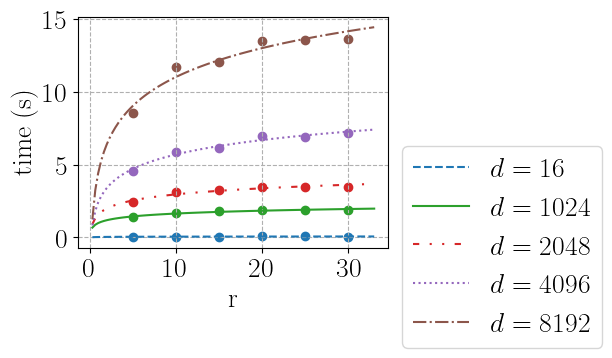

In [113]:
dataset_sizes = d

fig, ax = plt.subplots(1, figsize=(4,3))
ax.grid(ls="dashed")
ax.set(xlabel='r', ylabel=r'time (s)')
myline =np.linspace(0, 33, 100)

y = times[0]
mymodel = np.poly1d(np.polyfit(np.log2(n), y, 1))
ax.scatter(n, y, c='#1f77b4')
err = error[0]
# ax.errorbar(n, y,ls='none', yerr=err,c='black', fmt='.k')
ax.plot(myline, mymodel(np.log2(myline)),linestyle='dashed',label=r"$d=16$",c='#1f77b4')

y = times[1]
temp = times[1]+[5.80474]
ntemp = n+[128]
mymodel = np.poly1d(np.polyfit(np.log2(n), y, 1))
ax.scatter(n, y, c='#2ca02c')
ax.plot(myline, mymodel(np.log2(myline)),linestyle='solid',label=r"$d=1024$", c='#2ca02c')
# ax.errorbar(n, y,ls='none', yerr=err,c='black', fmt='.k')

y = times[2]
mymodel = np.poly1d(np.polyfit(np.log2(n), y, 1))
ax.scatter(n, y, c='#d62728')
ax.plot(myline, mymodel(np.log2(myline)),linestyle=(0, (3, 5, 1, 5, 1, 5)),label=r"$d=2048$",c='#d62728')
err = error[2]
# ax.errorbar(n, y,ls='none', yerr=err,c='black', fmt='.k')

y = times[3]
mymodel = np.poly1d(np.polyfit(np.log2(n), y, 1))
ax.scatter(n, y,c='#9467bd')
ax.plot(myline, mymodel(np.log2(myline)),linestyle='dotted',label=r"$d=4096$",c='#9467bd')
err = error[3]
# ax.errorbar(n, y,ls='none', yerr=err,c='black', fmt='.k')

y = times[4]
mymodel = np.poly1d(np.polyfit(np.log2(n), y, 1))
ax.scatter(n, y,c='#8c564b')
ax.plot(myline, mymodel(np.log2(myline)),linestyle='dashdot',label=r"$d=8192$",c='#8c564b')
err = error[4]
# ax.errorbar(n, y,ls='none', yerr=err,c='black', fmt='.k')

ax.set_xticks([0,10,20,30])
ax.set_yticks([0,5,10,15])

plt.savefig("benchmark_time_r_multi_b.pdf", bbox_inches='tight')


plt.legend(bbox_to_anchor=(1,0.5))

plt.show()



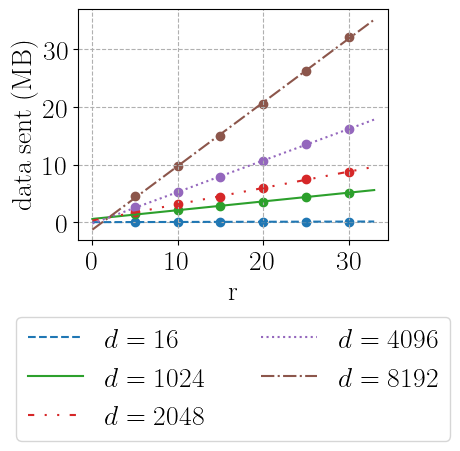

In [114]:
dataset_sizes = d
x = dataset_sizes
fig, ax = plt.subplots(1, figsize=(4,3))
ax.grid(ls="dashed")
ax.set(xlabel='r', ylabel=r'data sent (MB)')
myline =np.linspace(0, 33, 100)

y = data[0]
mymodel = np.poly1d(np.polyfit(n, y, 1))
ax.scatter(n, y,c='#1f77b4')
ax.plot(myline, mymodel(myline),linestyle='dashed',label=r"$d=16$",c='#1f77b4')

y = data[1]
mymodel = np.poly1d(np.polyfit(n, y, 1))
ax.scatter(n, y,c='#2ca02c')
ax.plot(myline, mymodel(myline),linestyle='solid',label=r"$d=1024$",c='#2ca02c')

y = data[2]
mymodel = np.poly1d(np.polyfit(n, y, 1))
ax.scatter(n, y,c='#d62728')
ax.plot(myline, mymodel(myline),linestyle=(0, (3, 5, 1, 5, 1, 5)),label=r"$d=2048$",c='#d62728')

y = data[3]
mymodel = np.poly1d(np.polyfit(n, y, 1))
ax.scatter(n, y,c='#9467bd')
ax.plot(myline, mymodel(myline),linestyle='dotted',label=r"$d=4096$",c='#9467bd')

y = data[4]
mymodel = np.poly1d(np.polyfit(n, y, 1))
ax.scatter(n, y,c='#8c564b')
ax.plot(myline, mymodel(myline),linestyle='dashdot',label=r"$d=8192$",c='#8c564b')

ax.set_xticks([0,10,20,30])
ax.set_yticks([0,10,20,30])

plt.savefig("benchmark_data_r_multi_b.pdf", bbox_inches='tight')

legend =ax.legend(loc=10, ncol=2, bbox_to_anchor=(0.5, -0.6))

def export_legend(legend, filename="legend_d.pdf"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)

plt.show()